In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd drive

/content/drive


In [ ]:
cd MyDrive/

/content/drive/MyDrive


In [ ]:
ls

 Assignment2/                       titanic/
'Colab Notebooks'/                 'To-do list.gsheet'
 Contact_jobs_data_analyst.gsheet  'Untitled document.gdoc'
 final_video_uea_vinayRam.mp4       VINAYFINALPRESENTATION.mp4
 test/


In [ ]:
cd test

/content/drive/MyDrive/test


In [ ]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('vinay.csv')
dataset

,rid,tiploc,pta,ptd,ata,atd,delay_time,t_delay,real_delay,min_delay,date,Train NO.,dates,DAY
0,2.019090e+14,WEYMTH,0,7:48:00,0,7:48:00,0:00,0,0,0,20190929,8734176,9/29/2019,Sunday
1,2.019090e+14,UPWEY,7:52:00,7:52:00,7:51:00,7:51:00,1:00,60,60,1,20190929,8734176,9/29/2019,Sunday
2,2.019090e+14,DRCHJN,0,0,0,0,0:00,0,0,0,20190929,8734176,9/29/2019,Sunday
3,2.019090e+14,DRCHS,7:59:00,8:00:00,7:58:00,8:00:00,0:00,0,0,0,20190929,8734176,9/29/2019,Sunday
4,2.019090e+14,MORETON,8:07:00,8:07:00,8:05:00,0,7:00,29220,0,0,20190929,8734176,9/29/2019,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142119,2.020020e+14,HCRTJN,0,0,18:35:00,18:35:00,35:00:00,66900,0,0,20200205,8717244,2/5/2020,Wednesday
142120,2.020020e+14,SURBITN,0,0,18:39:00,18:39:00,39:00:00,67140,0,0,20200205,8717244,2/5/2020,Wednesday
142121,2.020020e+14,BRLANDS,0,0,18:40:00,18:40:00,40:00:00,67200,0,0,20200205,8717244,2/5/2020,Wednesday
142122,2.020020e+14,NEWMLDN,0,0,0,0,0:00,0,0,0,20200205,8717244,2/5/2020,Wednesday


In [ ]:
dataset = dataset.drop([ 't_delay','real_delay','rid'], axis = 1)

In [ ]:
dataset.rename(columns={'Train NO.':'train number'}, inplace= True)

In [ ]:
dataset

,tiploc,pta,ptd,ata,atd,delay_time,min_delay,date,train number,dates,DAY
0,WEYMTH,0,7:48:00,0,7:48:00,0:00,0,20190929,8734176,9/29/2019,Sunday
1,UPWEY,7:52:00,7:52:00,7:51:00,7:51:00,1:00,1,20190929,8734176,9/29/2019,Sunday
2,DRCHJN,0,0,0,0,0:00,0,20190929,8734176,9/29/2019,Sunday
3,DRCHS,7:59:00,8:00:00,7:58:00,8:00:00,0:00,0,20190929,8734176,9/29/2019,Sunday
4,MORETON,8:07:00,8:07:00,8:05:00,0,7:00,0,20190929,8734176,9/29/2019,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
142119,HCRTJN,0,0,18:35:00,18:35:00,35:00:00,0,20200205,8717244,2/5/2020,Wednesday
142120,SURBITN,0,0,18:39:00,18:39:00,39:00:00,0,20200205,8717244,2/5/2020,Wednesday
142121,BRLANDS,0,0,18:40:00,18:40:00,40:00:00,0,20200205,8717244,2/5/2020,Wednesday
142122,NEWMLDN,0,0,0,0,0:00,0,20200205,8717244,2/5/2020,Wednesday


In [ ]:
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y%m%d')

In [ ]:
dataset.drop(dataset.index[dataset['ptd'] == '0'], inplace = True)

In [ ]:
# dataset['ptd'] = dataset['ptd'].apply(date_extract)

In [ ]:
# def date_extract(x):
#     if x == '0':
#       return 0
#     else:

#       temp = x.split(':')
#       x = (int(temp[0])  + int(temp[1]) * 0.01)
#       return x

In [ ]:
def convert_date(x):
  temp = x.split(':')
  x = (int(temp[0])  + int(temp[1]) * 0.01)
  return x

In [ ]:
dataset['ptd'] = dataset['ptd'].apply(convert_date)

In [ ]:
dataset['ptd'] = dataset['ptd'].astype(float)

In [ ]:
# dataset = dataset[dataset.pta != '0']

In [ ]:
def peak_hours(x):
    if (7 < x <= 9) or (16 <= x <= 20):
        return 1
    else:
        return 0

In [ ]:
dataset['peak_hours'] = dataset['ptd'].apply(peak_hours)
# dataset = dataset.drop([ 'pta','ata','atd','delay_time','tiploc','date','dates'], axis = 1)


In [ ]:
# def zero_filler():
#   if (dataset['pta'] == '0' ) :
#     dataset['pta'] = dataset['ptd']

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44466 entries, 0 to 142112
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   tiploc        44466 non-null  object        
 1   pta           44466 non-null  object        
 2   ptd           44466 non-null  float64       
 3   ata           44466 non-null  object        
 4   atd           44466 non-null  object        
 5   delay_time    44466 non-null  object        
 6   min_delay     44466 non-null  int64         
 7   date          44466 non-null  datetime64[ns]
 8   train number  44466 non-null  int64         
 9   dates         44466 non-null  object        
 10  DAY           44466 non-null  object        
 11  peak_hours    44466 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 4.4+ MB


In [ ]:
dataset['tiploc'].unique().size

65

In [ ]:
# dataset['peak_hours'] = dataset['ptd'].apply(peak_hours)

In [ ]:
dataset = dataset.drop([ 'pta','ata','atd','delay_time','dates','train number'], axis = 1)


In [ ]:
dataset

,tiploc,ptd,min_delay,date,DAY,peak_hours
0,WEYMTH,7.48,0,2019-09-29,Sunday,1
1,UPWEY,7.52,1,2019-09-29,Sunday,1
3,DRCHS,8.00,0,2019-09-29,Sunday,1
4,MORETON,8.07,0,2019-09-29,Sunday,1
5,WOOL,8.13,0,2019-09-29,Sunday,1
...,...,...,...,...,...,...
142090,BKNHRST,17.15,0,2020-02-05,Wednesday,1
142095,SOTON,17.30,1,2020-02-05,Wednesday,1
142099,SOTPKWY,17.38,1,2020-02-05,Wednesday,1
142102,WNCHSTR,17.48,2,2020-02-05,Wednesday,1


In [ ]:
df = dataset.copy()

df.size

266796

In [ ]:
df['month']      = df['date'].dt.month
df['day']        = df['date'].dt.day
df['week']       = df['date'].dt.isocalendar().week
df['weekday']    = df['date'].dt.weekday
df['weekend']    = (df['date'].dt.weekday>4).astype(int)
df['day_of_yr']  = df['date'].dt.dayofyear
df['quarter']    = df['date'].dt.quarter

In [ ]:
df = df.drop(['date','DAY','ptd','day_of_yr','week','day','tiploc'],axis= 1)

In [ ]:
# df.drop_duplicates(inplace=True)

# df = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
# df['Percentage'] = round(df['Total Null Values']/df.shape[0],3)*100
# print(df)

# print("\n\033[1mInference:\033[0m The datset doesn't have any inconsistant values.")

In [ ]:
# from collections import defaultdict
# d= defaultdict(LabelEncoder)         # trick to do encoding and decoding vary easily 😁
 
# x = df[['tiploc']]

# x=x.apply(lambda x: d[x.name].fit_transform(x))
# x.head()
# df[['tiploc']]=x
# df

In [ ]:
df

,min_delay,peak_hours,month,weekday,weekend,quarter
0,0,1,9,6,1,3
1,1,1,9,6,1,3
3,0,1,9,6,1,3
4,0,1,9,6,1,3
5,0,1,9,6,1,3
...,...,...,...,...,...,...
142090,0,1,2,2,0,1
142095,1,1,2,2,0,1
142099,1,1,2,2,0,1
142102,2,1,2,2,0,1


In [ ]:
X = df.iloc[:, :]
X = X.drop(['min_delay'], axis =1)
X = X.values
y = df.iloc[:, 1].values


print(X)
print(y)

[[1 9 6 1 3]
 [1 9 6 1 3]
 [1 9 6 1 3]
 ...
 [1 2 2 0 1]
 [1 2 2 0 1]
 [1 2 2 0 1]]
[1 1 1 ... 1 1 1]


In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))

In [ ]:
X[0]

array([1, 9, 6, 1, 3])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.size)
print(X_test.size)
print(y_train.size)
print(y_test.size)

177860
44470
35572
8894


In [ ]:
df.drop_duplicates(inplace=True)
print(X_train.size)
print(X_test.size)
print(y_train.size)
print(y_test.size)

177860
44470
35572
8894


In [ ]:
# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-9.57e-16  0.00e+00]
 [ 5.97e-17  0.00e+00]
 [ 1.00e+00  1.00e+00]
 ...
 [ 1.00e+00  1.00e+00]
 [ 5.97e-17  0.00e+00]
 [ 1.45e-16  0.00e+00]]


In [ ]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test, y_pred, squared=False)
rms

7.30247378016144e-16

In [ ]:
y_test.size

ValueError: ignored

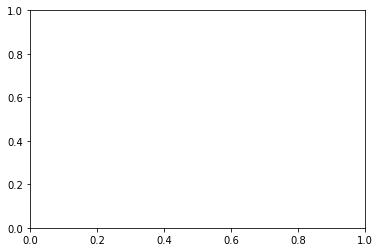

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()
